In [31]:
import numpy as np
import matplotlib.pyplot as plt

----
- Load data

In [32]:
data = np.load('/data/dell5/userdir/jyj/LAMOST/bstars_info.npy')

In [33]:
flux = data['flux']
label = data['label']
snr = data['snr']
size = data.shape[0]

- show SNR

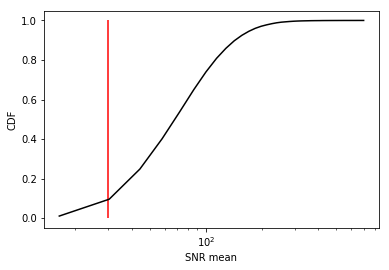

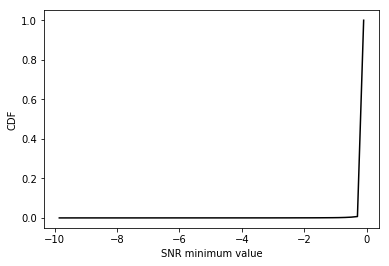

In [34]:
snr_mean = snr.mean(axis=1)
snr_min = snr.min(axis=1)
hist_mean = np.histogram(snr_mean, 50)
hist_min = np.histogram(snr_min, 50)
x = hist_mean[1][:-1]+(hist_mean[1][1]-hist_mean[1][0])/2.
y = hist_mean[0]/float(size)
y = np.array([y[:i].sum() for i in xrange(1,y.shape[0]+1)])
plt.plot(x, y, 'k-', label='snr mean')
plt.vlines(x=30,ymin=0,ymax=1,color='red')
plt.xscale('log')
plt.ylabel('CDF')
plt.xlabel('SNR mean')
plt.show()

x = hist_min[1][:-1]+(hist_min[1][1]-hist_min[1][0])/2.
y = hist_min[0]/float(size)
y = np.array([y[:i].sum() for i in xrange(1,y.shape[0]+1)])
plt.plot(x, y, 'k-', label='snr min')
plt.ylabel('CDF')
plt.xlabel('SNR minimum value')
plt.show()

**Remove data points that mean SNR<30**
[Ting 2017](https://doi.org/10.3847/2041-8213/aa921c), [Ho 2017](http://iopscience.iop.org/article/10.3847/1538-4357/836/1/5/meta)

---
- show flux

In [35]:
mean = flux.mean(axis=1)
std = flux.std(axis=1)

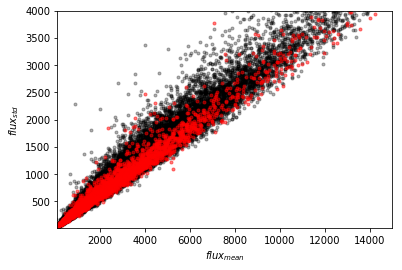

In [36]:
bool_i = label==1
bool_n = label==0
plt.plot(mean[bool_n], std[bool_n], 'k.', alpha=0.3)
plt.plot(mean[bool_i], std[bool_i], 'r.', alpha=0.5)
plt.xlabel('$flux_{mean}$')
plt.ylabel('$flux_{std}$')
plt.xlim([100,15000])
plt.ylim([10,4000])
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [37]:
bins = np.logspace(np.log10(1),np.log10(15000),51)
hist_n = np.histogram(mean[bool_n], bins)[0]/float(bool_n.sum())
hist_i = np.histogram(mean[bool_i], bins)[0]/float(bool_i.sum())

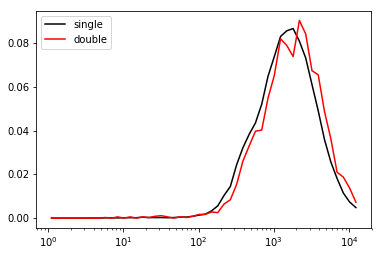

In [38]:
plt.plot(bins[:-1]+(bins[1]-bins[0])*0.5, hist_n, 'k-', label='single')
plt.plot(bins[:-1]+(bins[1]-bins[0])*0.5, hist_i, 'r-', label='double')
plt.xscale('log')
plt.legend()
plt.show()

In [39]:
bins = np.logspace(np.log10(1),np.log10(4000),51)
hist_n = np.histogram(std[bool_n], bins)[0]/float(bool_n.sum())
hist_i = np.histogram(std[bool_i], bins)[0]/float(bool_i.sum())

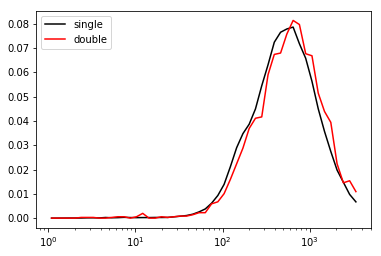

In [40]:
plt.plot(bins[:-1]+(bins[1]-bins[0])*0.5, hist_n, 'k-', label='single')
plt.plot(bins[:-1]+(bins[1]-bins[0])*0.5, hist_i, 'r-', label='double')
plt.xscale('log')
plt.legend()
plt.show()